# Line Optimization Tool Set Up

This notebook implements a line optimization tool for NCAA College Basketball. The tool clusters players into roles (e.g., "sharp shooter," "slasher"), identifies their weaknesses, and suggests optimal lineups to counter the opponent's strengths.

In [83]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Project Steps

In [84]:
import io

header_path = "pstatheaders.xlsx"

header_list = (
    pd.read_excel(header_path, header=None)
      .iloc[0]
      .tolist()
)

csv_url = "https://barttorvik.com/getadvstats.php?year=2024&csv=1"

# Add a User-Agent header to the request
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(csv_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Use io.StringIO to read the content with pandas
    cbb_2023 = pd.read_csv(io.StringIO(response.text), header=None)
    cbb_2023.columns = header_list
    print("Data loaded successfully.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    print(response.text) # Print the response content for debugging

Data loaded successfully.


In [85]:
header_path = "pstatheaders.xlsx"

header_list = (
    pd.read_excel(header_path, header=None)
      .iloc[0]
      .tolist()
)

csv_url1 = "https://barttorvik.com/getadvstats.php?year=2025&csv=1"

# Add a User-Agent header to the request
headers = {'User-Agent': 'Mozilla/5.0'}
response1 = requests.get(csv_url1, headers=headers)

# Check if the request was successful
if response1.status_code == 200:
    # Use io.StringIO to read the content with pandas
    cbb_2024 = pd.read_csv(io.StringIO(response1.text), header=None)
    cbb_2024.columns = header_list
    print("Data loaded successfully.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    print(response.text) # Print the response content for debugging

Data loaded successfully.


## Data Cleaning

In [86]:
cbb_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   player_name                       5002 non-null   object 
 1   team                              5002 non-null   object 
 2   conf                              5002 non-null   object 
 3   GP                                5002 non-null   int64  
 4   Min_per                           5002 non-null   float64
 5   ORtg                              5002 non-null   float64
 6   usg                               5002 non-null   float64
 7   eFG                               5002 non-null   float64
 8   TS_per                            5002 non-null   float64
 9   ORB_per                           5002 non-null   float64
 10  DRB_per                           5002 non-null   float64
 11  AST_per                           5002 non-null   float64
 12  TO_per

In [87]:
cbb_2023.isnull().sum()

,0
player_name,0
team,0
conf,0
GP,0
Min_per,0
...,...
stl,0
blk,0
pts,0
role,1


In [88]:
cbb_2023 = cbb_2023.dropna(subset=['role'])


cbb_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 0 to 5001
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   player_name                       5001 non-null   object 
 1   team                              5001 non-null   object 
 2   conf                              5001 non-null   object 
 3   GP                                5001 non-null   int64  
 4   Min_per                           5001 non-null   float64
 5   ORtg                              5001 non-null   float64
 6   usg                               5001 non-null   float64
 7   eFG                               5001 non-null   float64
 8   TS_per                            5001 non-null   float64
 9   ORB_per                           5001 non-null   float64
 10  DRB_per                           5001 non-null   float64
 11  AST_per                           5001 non-null   float64
 12  TO_per     

After loading the data, we inspect it to identify any missing values or inconsistencies that need to be addressed before proceeding with the analysis.

We will drop rows with missing values in the 'role' column as it is crucial for our analysis.

## Player Clustering

In [89]:
# Importing the necessary library to fix the error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Adjusting the stats_columns to ensure all columns exist in the dataset
stats_columns = ['GP', 'Min_per', 'ORtg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
                 'FT_per', 'twoP_per', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr',
                 'mp', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']

# Filter the dataset for clustering
clustering_data = cbb_2023[stats_columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clustering_data['role_cluster'] = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the original dataset
cbb_2023['role_cluster'] = clustering_data['role_cluster']

/tmp/ipython-input-89-3970394705.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbb_2023['role_cluster'] = clustering_data['role_cluster']


In [90]:
stats_columns = ['GP', 'Min_per', 'ORtg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
                 'FT_per', 'twoP_per', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr',
                 'mp', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']

# Filter the dataset for clustering
clustering_data_2024 = cbb_2024[stats_columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data2024 = scaler.fit_transform(clustering_data_2024)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clustering_data_2024['role_cluster'] = kmeans.fit_predict(scaled_data2024)

# Add the cluster labels back to the original dataset
cbb_2024['role_cluster'] = clustering_data_2024['role_cluster']

The clustering model groups players based on their statistical profiles into distinct roles. The `role_cluster` column in the dataset indicates the assigned cluster for each player.

## Role Distribution

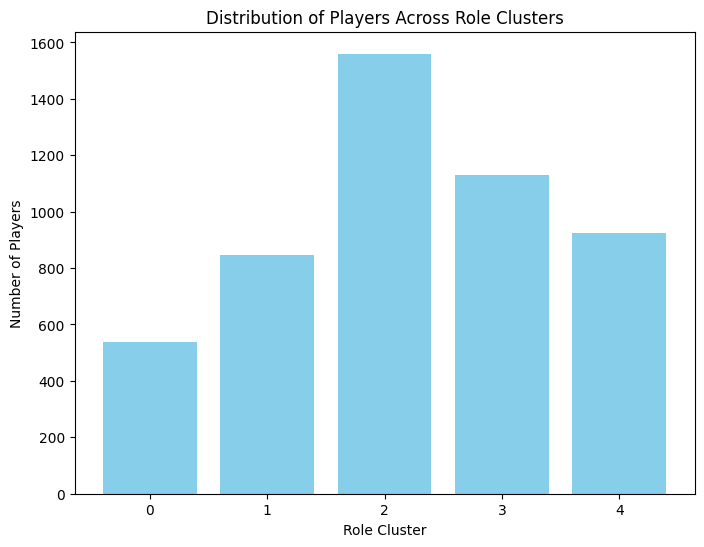

In [91]:
import matplotlib.pyplot as plt

# Count the number of players in each role cluster
role_counts = cbb_2023['role_cluster'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(role_counts.index, role_counts.values, color='skyblue')
plt.xlabel('Role Cluster')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Across Role Clusters')
plt.xticks(role_counts.index)
plt.show()

This chart provides a visual overview of how players are distributed across the identified role clusters.

## Role Name Assignment

In [92]:
# Analyze the characteristics of each cluster to assign role names
cluster_characteristics = cbb_2023.groupby('role_cluster')[stats_columns].mean()
cluster_characteristics

,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,adjoe,pfr,mp,oreb,dreb,treb,ast,stl,blk,pts
role_cluster,,,,,,,,,,,,,,,,,,,,,
0,5.641264,1.542751,25.081784,13.576394,6.266543,8.370799,2.643494,10.274721,4.542007,18.671004,...,20.487084,4.170446,3.438059,0.110830,0.337447,0.448277,0.159820,0.106316,0.037877,0.578939
1,29.269504,55.921158,109.761584,19.987943,54.666312,56.935272,9.079078,18.124232,8.936879,16.585697,...,109.664019,4.034279,24.170684,1.885934,3.876045,5.761982,1.127091,0.716929,0.853596,9.430535
2,23.344231,28.366603,101.087051,16.456090,48.592564,51.918083,3.233910,10.443782,10.187179,17.731795,...,95.313800,3.551731,14.315961,0.425447,1.350741,1.776190,0.804947,0.446124,0.137505,4.175497
3,29.930150,69.405040,106.339434,21.776304,49.939346,53.863271,2.861185,11.589567,17.304951,15.967286,...,108.720472,2.757294,29.425178,0.723559,2.974832,3.698391,2.607543,1.084622,0.231025,12.058563
4,16.238661,10.928834,103.585097,16.769654,51.323326,53.415799,8.955832,15.236825,6.422678,19.080022,...,97.567571,5.524514,7.406796,0.588542,1.009020,1.597563,0.277963,0.197132,0.237775,2.056247


In [93]:
# Assign role names based on statistical characteristics
role_names = {
    0: "Bench Player",  # Low minutes, low stats overall
    1: "Star Player",   # High minutes, high stats across the board
    2: "Rarely Used",   # Very low minutes and stats
    3: "Playmaker",     # High assists, decent scoring
    4: "Role Player"    # Moderate stats, contributes in specific areas
}

# Map role names to the clusters
cbb_2023['role_name'] = cbb_2023['role_cluster'].map(role_names)

# Display the updated dataset with role names
cbb_2023[['player_name', 'team', 'role_cluster', 'role_name']].head()

,player_name,team,role_cluster,role_name
0,DeJuan Clayton,Manhattan,2,Rarely Used
1,Seth Towns,Howard,3,Playmaker
2,Terrence Lewis,Grambling St.,2,Rarely Used
3,Austin Williams,Rutgers,2,Rarely Used
4,Avery Wilson,Southeastern Louisiana,2,Rarely Used


In [94]:
# Map role names to the clusters
cbb_2024['role_name'] = cbb_2024['role_cluster'].map(role_names)

# Display the updated dataset with role names
cbb_2024[['player_name', 'team', 'role_cluster', 'role_name']].head()

,player_name,team,role_cluster,role_name
0,Robby Carmody,Le Moyne,3.0,Playmaker
1,Drue Drinnon,Texas St.,0.0,Bench Player
2,K.J. Hymes,Nevada,0.0,Bench Player
3,Jack Clark,VCU,1.0,Star Player
4,Robert Braswell,Charlotte,3.0,Playmaker


By analyzing the average statistics within each cluster, we can assign meaningful names to each role, such as "Bench Player," "Star Player," etc.

## Role Category Assignment

In [95]:
def assign_role_category(row):
    if row['TP_per'] > 0.4 and row['pts'] > 10:  # High 3-point efficiency and scoring
        return "3P Sharp Shooter"
    elif row['pts'] > 15 and row['ast'] > 3 and row['treb'] > 5:  # High scoring, assists, and rebounds
        return "All-Around Star"
    elif row['mp'] < 5:  # Very low minutes played
        return "Minimal Contributor"
    elif row['twoP_per'] > 0.5 and row['pts'] > 10:  # High inside scoring
        return "Slasher"
    elif row['pts'] > 8 and row['twoP_per'] > 0.4 and row['TP_per'] < 0.35:  # Moderate scoring, midrange efficiency
        return "Midrange Specialist"
    else:
        return "Role Player"  # Default category for other players

# Apply the function to assign role categories
cbb_2023['role_category'] = cbb_2023.apply(assign_role_category, axis=1)

# Display the updated dataset with role categories
cbb_2023[['player_name', 'team', 'role_cluster', 'role_name', 'role_category']].head()

,player_name,team,role_cluster,role_name,role_category
0,DeJuan Clayton,Manhattan,2,Rarely Used,Slasher
1,Seth Towns,Howard,3,Playmaker,Role Player
2,Terrence Lewis,Grambling St.,2,Rarely Used,Role Player
3,Austin Williams,Rutgers,2,Rarely Used,Role Player
4,Avery Wilson,Southeastern Louisiana,2,Rarely Used,Role Player


In [96]:
# Apply the function to assign role categories
cbb_2024['role_category'] = cbb_2024.apply(assign_role_category, axis=1)

# Display the updated dataset with role categories
cbb_2024[['player_name', 'team', 'role_cluster', 'role_name', 'role_category']]

,player_name,team,role_cluster,role_name,role_category
0,Robby Carmody,Le Moyne,3.0,Playmaker,Slasher
1,Drue Drinnon,Texas St.,0.0,Bench Player,Role Player
2,K.J. Hymes,Nevada,0.0,Bench Player,Role Player
3,Jack Clark,VCU,1.0,Star Player,Role Player
4,Robert Braswell,Charlotte,3.0,Playmaker,Slasher
...,...,...,...,...,...
5055,Jadarius Townes,Mississippi Valley St.,4.0,Role Player,Minimal Contributor
5056,Elijah Crawford,BYU,0.0,Bench Player,Role Player
5057,Max Triplett,BYU,4.0,Role Player,Minimal Contributor
5058,Fedor Zugic,Creighton,0.0,Bench Player,Role Player


In addition to general roles, we can categorize players based on their specific playstyle, such as "3P Sharp Shooter," "Slasher," or "Midrange Specialist."

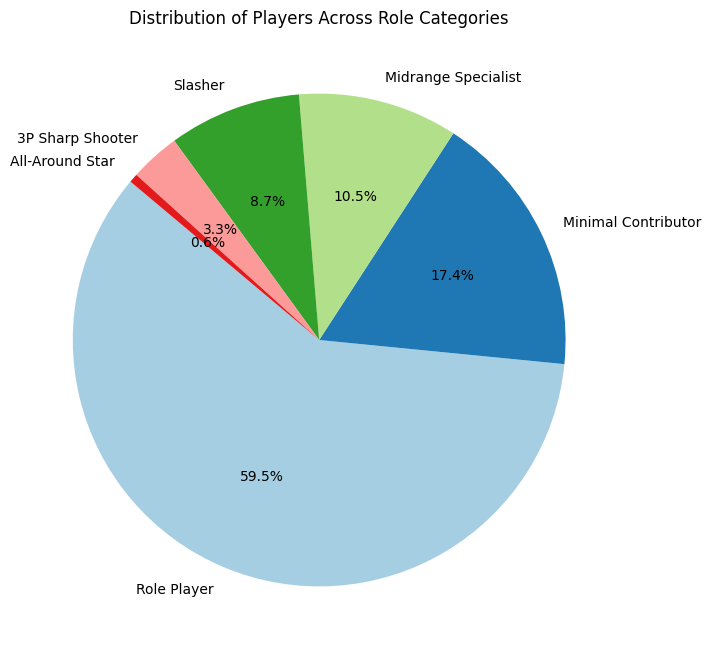

In [97]:
role_category_counts = cbb_2023['role_category'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(role_category_counts, labels=role_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Players Across Role Categories')
plt.show()

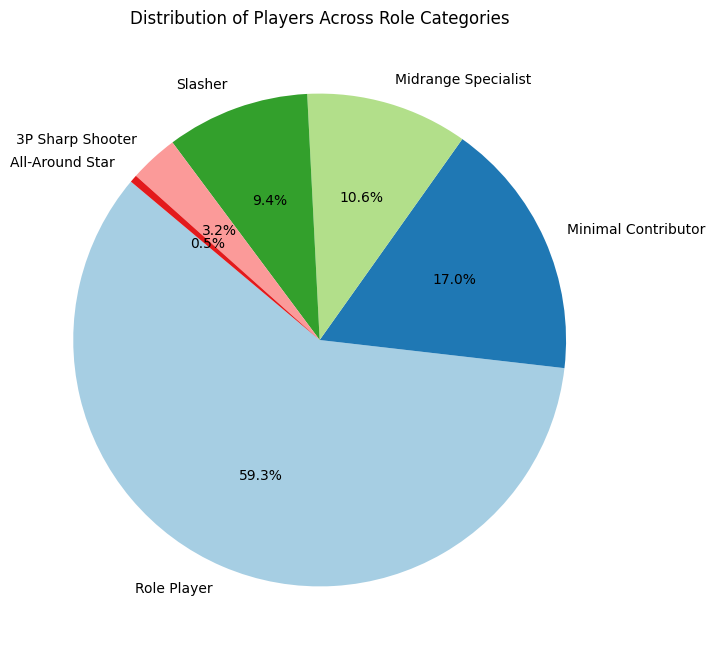

In [98]:
role_category_counts = cbb_2024['role_category'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(role_category_counts, labels=role_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Players Across Role Categories')
plt.show()

## Weakness Mapping

In [99]:
def map_player_weaknesses(row):
    weaknesses = []

    if row['TO_per'] > 20:  # High turnover percentage
        weaknesses.append("Turnover Prone")
    if row['FT_per'] < 0.6:  # Poor free throw shooter
        weaknesses.append("Poor Free Throw Shooter")
    if row['TP_per'] < 0.3 and row['TPA'] > 50:  # Inefficient 3-point shooter
        weaknesses.append("Inefficient 3P Shooter")
    if row['twoP_per'] < 0.4 and row['twoPA'] > 50:  # Inefficient inside scorer
        weaknesses.append("Inefficient Inside Scorer")
    if row['Min_per'] < 10:  # Low playing time
        weaknesses.append("Limited Playing Time")

    return ", ".join(weaknesses) if weaknesses else "None"

# Apply the function to map weaknesses
cbb_2023['weaknesses'] = cbb_2023.apply(map_player_weaknesses, axis=1)

# Display the updated dataset with weaknesses
cbb_2023[['player_name', 'team', 'role_name', 'role_category', 'weaknesses']]

,player_name,team,role_name,role_category,weaknesses
0,DeJuan Clayton,Manhattan,Rarely Used,Slasher,"Turnover Prone, Poor Free Throw Shooter, Limit..."
1,Seth Towns,Howard,Playmaker,Role Player,Inefficient Inside Scorer
2,Terrence Lewis,Grambling St.,Rarely Used,Role Player,None
3,Austin Williams,Rutgers,Rarely Used,Role Player,"Turnover Prone, Poor Free Throw Shooter"
4,Avery Wilson,Southeastern Louisiana,Rarely Used,Role Player,"Turnover Prone, Poor Free Throw Shooter"
...,...,...,...,...,...
4997,Stephon Smith,Mississippi Valley St.,Role Player,Minimal Contributor,Limited Playing Time
4998,Mike Walker,Albany,Bench Player,Minimal Contributor,"Turnover Prone, Poor Free Throw Shooter, Limit..."
4999,Cade Brazier,Southern Utah,Bench Player,Minimal Contributor,"Turnover Prone, Poor Free Throw Shooter, Limit..."
5000,Jackson Prince,Towson,Bench Player,Minimal Contributor,"Poor Free Throw Shooter, Limited Playing Time"


In [100]:
cbb_2024['weaknesses'] = cbb_2024.apply(map_player_weaknesses, axis=1)

# Display the updated dataset with weaknesses
cbb_2024[['player_name', 'team', 'role_name', 'role_category', 'weaknesses']]

,player_name,team,role_name,role_category,weaknesses
0,Robby Carmody,Le Moyne,Playmaker,Slasher,None
1,Drue Drinnon,Texas St.,Bench Player,Role Player,Turnover Prone
2,K.J. Hymes,Nevada,Bench Player,Role Player,Poor Free Throw Shooter
3,Jack Clark,VCU,Star Player,Role Player,None
4,Robert Braswell,Charlotte,Playmaker,Slasher,None
...,...,...,...,...,...
5055,Jadarius Townes,Mississippi Valley St.,Role Player,Minimal Contributor,"Poor Free Throw Shooter, Limited Playing Time"
5056,Elijah Crawford,BYU,Bench Player,Role Player,Limited Playing Time
5057,Max Triplett,BYU,Role Player,Minimal Contributor,"Poor Free Throw Shooter, Limited Playing Time"
5058,Fedor Zugic,Creighton,Bench Player,Role Player,None


## Lineup Optimization


In [101]:
def optimize_lineup(team_a, team_b):
    # Filter players for Team A and Team B
    team_a_players = cbb_2023[cbb_2023['team'] == team_a]
    team_b_players = cbb_2023[cbb_2023['team'] == team_b]

    # Identify Team B's weaknesses
    team_b_weaknesses = team_b_players['weaknesses'].value_counts()

    # Create a list to store matchups
    matchups = []

    # Iterate through each player in Team B
    for _, team_b_player in team_b_players.iterrows():
        best_matchup = None
        best_score = -float('inf')

        # Iterate through each player in Team A to find the best matchup
        for _, team_a_player in team_a_players.iterrows():
            score = 0

            # Evaluate matchup based on weaknesses
            if "Turnover Prone" in team_b_player['weaknesses']:
                score += team_a_player['stl']  # High steals to exploit turnovers
            if "Poor Free Throw Shooter" in team_b_player['weaknesses']:
                score += team_a_player['FTA']  # High free throw attempts to draw fouls
            if "Inefficient 3P Shooter" in team_b_player['weaknesses']:
                score += team_a_player['blk'] + team_a_player['stl']  # High blocks and steals for 3P defense
            if "Inefficient Inside Scorer" in team_b_player['weaknesses']:
                score += team_a_player['blk']  # High blocks for inside defense
            if "Limited Playing Time" in team_b_player['weaknesses']:
                score += team_a_player['Min_per']  # High minutes to dominate

            # Update the best matchup if the current score is higher
            if score > best_score:
                best_score = score
                best_matchup = team_a_player

        # Append the matchup to the list
        matchups.append({
            'team_b_player': team_b_player['player_name'],
            'team_b_weaknesses': team_b_player['weaknesses'],
            'best_matchup': best_matchup['player_name'] if best_matchup is not None else None
        })

    # Convert matchups to a DataFrame
    matchups_df = pd.DataFrame(matchups)

    return team_a_players, matchups_df

# Example usage
team_a = "Duke"
team_b = "North Carolina"
team_a_players, matchups_df = optimize_lineup(team_a, team_b)
team_a_players, matchups_df
def optimize_lineup(team_a, team_b, season):
    # Filter the dataset for the given season
    season_data = cbb_2023 if season == "2023-2024" else cbb_2024

    # Filter players for Team A and Team B
    team_a_players = season_data[season_data['team'] == team_a]
    team_b_players = season_data[season_data['team'] == team_b]

    # Identify Team B's weaknesses
    team_b_weaknesses = team_b_players['weaknesses'].value_counts()

    # Create a list to store matchups
    matchups = []

    # Iterate through each player in Team B
    for _, team_b_player in team_b_players.iterrows():
        best_matchup = None
        best_score = -float('inf')

        # Iterate through each player in Team A to find the best matchup
        for _, team_a_player in team_a_players.iterrows():
            score = 0

            # Evaluate matchup based on weaknesses
            if "Turnover Prone" in team_b_player['weaknesses']:
                score += team_a_player['stl']  # High steals to exploit turnovers
            if "Poor Free Throw Shooter" in team_b_player['weaknesses']:
                score += team_a_player['FTA']  # High free throw attempts to draw fouls
            if "Inefficient 3P Shooter" in team_b_player['weaknesses']:
                score += team_a_player['blk'] + team_a_player['stl']  # High blocks and steals for 3P defense
            if "Inefficient Inside Scorer" in team_b_player['weaknesses']:
                score += team_a_player['blk']  # High blocks for inside defense
            if "Limited Playing Time" in team_b_player['weaknesses']:
                score += team_a_player['Min_per']  # High minutes to dominate

            # Update the best matchup if the current score is higher
            if score > best_score:
                best_score = score
                best_matchup = team_a_player

        # Append the matchup to the list
        matchups.append({
            'team_b_player': team_b_player['player_name'],
            'team_b_weaknesses': team_b_player['weaknesses'],
            'best_matchup': best_matchup['player_name'] if best_matchup is not None else None
        })

    # Convert matchups to a DataFrame
    matchups_df = pd.DataFrame(matchups)

    return team_a_players, matchups_df
# This function identifies the optimal lineup for a given team against an opponent by evaluating the matchup efficiency based on player roles and weaknesses.



(           player_name  team conf  GP  Min_per   ORtg   usg   eFG  TS_per  \
 90          Ryan Young  Duke  ACC  36     29.6  111.4  16.2  58.2   59.79   
 316      Neal Begovich  Duke  ACC   8      1.1   65.3  14.1   0.0   20.20   
 1217      Jeremy Roach  Duke  ACC  35     79.4  121.4  20.3  54.4   59.21   
 1909   Spencer Hubbard  Duke  ACC  10      1.7   92.4  16.5  41.7   43.17   
 2115     Jaylen Blakes  Duke  ACC  31     19.9  112.3  11.0  45.6   53.70   
 2803   Kyle Filipowski  Duke  ACC  36     76.0  114.5  27.7  55.1   57.45   
 2804     Mark Mitchell  Duke  ACC  33     65.7  117.3  20.0  56.2   58.32   
 3370    Tyrese Proctor  Duke  ACC  32     67.6  115.8  18.1  52.5   54.51   
 3384  Christian Reeves  Duke  ACC   3      1.0   83.5  20.8  66.7   63.29   
 4904      Caleb Foster  Duke  ACC  27     47.7  110.8  16.2  52.1   54.53   
 4905      Jared McCain  Duke  ACC  36     79.0  122.0  19.7  57.7   61.14   
 4906      Sean Stewart  Duke  ACC  33     19.2  118.6  18.5  57

This function identifies the optimal lineup for a given team against an opponent by evaluating the matchup efficiency based on player roles and weaknesses.

In [115]:
from itertools import combinations

def evaluate_lineup(lineup, team_b_players):
    total_score = 0

    for _, team_b_player in team_b_players.iterrows():
        best_score = -float('inf')

        for player in lineup:
            score = 0

            if "Turnover Prone" in team_b_player['weaknesses']:
                score += player['stl']
            if "Poor Free Throw Shooter" in team_b_player['weaknesses']:
                score += player['FTA']
            if "Inefficient 3P Shooter" in team_b_player['weaknesses']:
                score += player['blk'] + player['stl']
            if "Inefficient Inside Scorer" in team_b_player['weaknesses']:
                score += player['blk']
            if "Limited Playing Time" in team_b_player['weaknesses']:
                score += player['Min_per']

            if score > best_score:
                best_score = score

        total_score += best_score

    return total_score

def find_optimal_lineup(team_a, team_b):
    team_a_players = cbb_2023[cbb_2023['team'] == team_a]
    team_b_players = cbb_2023[cbb_2023['team'] == team_b]

    best_lineup = None
    best_score = -float('inf')

    for lineup_indices in combinations(team_a_players.index, 5):
        lineup = team_a_players.loc[list(lineup_indices)]
        lineup_score = evaluate_lineup(lineup.to_dict('records'), team_b_players)

        if lineup_score > best_score:
            best_score = lineup_score
            best_lineup = lineup

    return best_lineup, best_score

# Example usage
optimal_lineup, optimal_score = find_optimal_lineup(team_a, team_b)
optimal_lineup, optimal_score

(          player_name  team conf  GP  Min_per   ORtg   usg   eFG  TS_per  \
 90         Ryan Young  Duke  ACC  36     29.6  111.4  16.2  58.2   59.79   
 316     Neal Begovich  Duke  ACC   8      1.1   65.3  14.1   0.0   20.20   
 1217     Jeremy Roach  Duke  ACC  35     79.4  121.4  20.3  54.4   59.21   
 1909  Spencer Hubbard  Duke  ACC  10      1.7   92.4  16.5  41.7   43.17   
 2803  Kyle Filipowski  Duke  ACC  36     76.0  114.5  27.7  55.1   57.45   
 
       ORB_per  ...     stl     blk      pts        role    3p/100?  \
 90       13.9  ...  0.3056  0.4722   2.7778           C   0.139307   
 316       7.6  ...  0.0000  0.0000   0.2500           C  11.245800   
 1217      2.2  ...  1.0571  0.1429  13.9714  Scoring PG   6.543550   
 1909      0.0  ...  0.0000  0.0000   0.6000   Stretch 4   9.702290   
 2803      8.6  ...  1.1667  1.4722  16.4167        PF/C   6.076700   
 
       role_cluster     role_name        role_category  \
 90               4   Role Player          Role Pl

evaluate_lineup(lineup, team_b_players): This function scores a 5-player lineup from Team A by checking how well each player can counter Team B’s weaknesses. It matches Team A’s best defenders or scorers to the most vulnerable players on Team B and adds up the matchup scores.

find_optimal_lineup(team_a, team_b): This function looks at every possible 5-player combination from Team A, scores each one using evaluate_lineup, and finds the lineup that performs best overall against Team B. It returns that best lineup and its score.

## Role Summary

> Generate a clustering model to categorize players into roles based on their statistics.

In [116]:
# Generate a summary of player roles and their characteristics
role_summary = cbb_2023.groupby(['role_name', 'role_category']).agg({
    'GP': 'mean',
    'Min_per': 'mean',
    'pts': 'mean',
    'ast': 'mean',
    'stl': 'mean',
    'blk': 'mean',
    'role_cluster': 'count'
}).rename(columns={'role_cluster': 'player_count'}).sort_values(by='player_count', ascending=False)

role_summary

,,GP,Min_per,pts,ast,stl,blk,player_count
role_name,role_category,,,,,,,
Rarely Used,Role Player,24.834055,30.686075,4.304958,0.856790,0.474529,0.146406,1386
Role Player,Role Player,19.837097,15.373226,2.591831,0.351753,0.253541,0.321877,620
Playmaker,Role Player,30.026786,66.600670,10.429573,2.473429,1.011184,0.199755,448
Bench Player,Minimal Contributor,5.067442,0.825349,0.385165,0.107137,0.072266,0.027107,430
Star Player,Role Player,29.540865,48.455769,6.641819,0.833741,0.624615,0.791478,416
Playmaker,Midrange Specialist,29.479042,70.419760,12.162375,2.807052,1.185960,0.238254,334
Role Player,Minimal Contributor,8.947712,1.923856,0.971075,0.128454,0.082837,0.067372,306
Star Player,Slasher,29.678112,65.917597,13.059261,1.457164,0.823198,0.993267,233
Playmaker,Slasher,30.385787,71.536548,13.656096,2.461387,1.076625,0.266704,197


## Optimization

In [117]:
# Add a column called 'season' to the dataset
cbb_2023['season'] = "2023-2024"
cbb_2023

,player_name,team,conf,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,stl,blk,pts,role,3p/100?,role_cluster,role_name,role_category,weaknesses,season
0,DeJuan Clayton,Manhattan,MAAC,2,4.3,88.3,27.8,47.4,49.27,0.0,...,0.0000,0.0000,11.0000,Wing G,5.72939,2,Rarely Used,Slasher,"Turnover Prone, Poor Free Throw Shooter, Limit...",2023-2024
1,Seth Towns,Howard,MEAC,30,73.4,108.2,22.1,45.2,52.19,4.2,...,0.9688,0.4375,14.1250,Stretch 4,10.66980,3,Playmaker,Role Player,Inefficient Inside Scorer,2023-2024
2,Terrence Lewis,Grambling St.,SWAC,20,26.9,116.1,19.0,63.9,64.03,3.2,...,0.4783,0.1739,7.9130,Wing G,9.57880,2,Rarely Used,Role Player,None,2023-2024
3,Austin Williams,Rutgers,B10,26,32.1,85.7,16.5,50.0,48.56,5.3,...,0.4615,0.2692,3.9615,Wing G,2.25313,2,Rarely Used,Role Player,"Turnover Prone, Poor Free Throw Shooter",2023-2024
4,Avery Wilson,Southeastern Louisiana,Slnd,29,27.8,87.8,16.7,45.1,47.15,4.1,...,0.4062,0.0938,3.1875,Wing G,4.45058,2,Rarely Used,Role Player,"Turnover Prone, Poor Free Throw Shooter",2023-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Stephon Smith,Mississippi Valley St.,SWAC,7,2.5,93.9,14.4,40.0,47.46,7.5,...,0.1429,0.0000,1.0000,PF/C,0.00000,4,Role Player,Minimal Contributor,Limited Playing Time,2023-2024
4998,Mike Walker,Albany,AE,2,0.2,0.0,18.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,PF/C,0.00000,0,Bench Player,Minimal Contributor,"Turnover Prone, Poor Free Throw Shooter, Limit...",2023-2024
4999,Cade Brazier,Southern Utah,WAC,3,0.5,0.0,15.9,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,Combo G,9.62790,0,Bench Player,Minimal Contributor,"Turnover Prone, Poor Free Throw Shooter, Limit...",2023-2024
5000,Jackson Prince,Towson,CAA,3,0.4,94.0,31.6,37.5,37.50,0.0,...,0.0000,0.0000,1.0000,Wing G,47.20800,0,Bench Player,Minimal Contributor,"Poor Free Throw Shooter, Limited Playing Time",2023-2024


In [118]:
cbb_2024['season'] = "2024-2025"
cbb_2024

,player_name,team,conf,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,stl,blk,pts,role,3p/100?,role_cluster,role_name,role_category,weaknesses,season
0,Robby Carmody,Le Moyne,NEC,24,50.1,109.9,21.0,52.4,58.37,3.8,...,0.8800,0.2400,11.2400,Combo G,8.84099,3.0,Playmaker,Slasher,None,2024-2025
1,Drue Drinnon,Texas St.,SB,24,43.8,109.0,13.7,54.2,58.26,1.1,...,0.4231,0.0769,6.0385,Scoring PG,6.34446,0.0,Bench Player,Role Player,Turnover Prone,2024-2025
2,K.J. Hymes,Nevada,MWC,31,28.9,112.5,16.1,63.5,59.47,12.6,...,0.3226,0.4194,3.4194,C,0.00000,0.0,Bench Player,Role Player,Poor Free Throw Shooter,2024-2025
3,Jack Clark,VCU,A10,34,72.2,127.8,16.0,58.5,61.35,6.9,...,1.0286,0.4286,9.6571,Stretch 4,8.38474,1.0,Star Player,Role Player,None,2024-2025
4,Robert Braswell,Charlotte,Amer,32,61.9,115.5,20.2,55.5,61.30,4.3,...,0.7879,0.6970,10.9394,Wing G,8.51174,3.0,Playmaker,Slasher,None,2024-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,Jadarius Townes,Mississippi Valley St.,SWAC,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,PF/C,0.00000,4.0,Role Player,Minimal Contributor,"Poor Free Throw Shooter, Limited Playing Time",2024-2025
5056,Elijah Crawford,BYU,B12,21,7.5,102.5,17.4,38.5,42.63,5.5,...,0.2857,0.0000,1.1905,Scoring PG,4.79144,0.0,Bench Player,Role Player,Limited Playing Time,2024-2025
5057,Max Triplett,BYU,B12,8,0.9,142.5,8.0,0.0,0.00,28.5,...,0.0000,0.1250,0.0000,C,0.00000,4.0,Role Player,Minimal Contributor,"Poor Free Throw Shooter, Limited Playing Time",2024-2025
5058,Fedor Zugic,Creighton,BE,22,17.9,111.9,18.4,61.3,64.37,1.5,...,0.2273,0.1818,4.5455,Wing G,9.09571,0.0,Bench Player,Role Player,None,2024-2025


In [119]:
def find_optimal_lineup(team_a, team_b, season):
    # Filter the dataset for the given season
    season_data = cbb_2023 if season == "2023-2024" else cbb_2024

    team_a_players = season_data[season_data['team'] == team_a]
    team_b_players = season_data[season_data['team'] == team_b]

    best_lineup = None
    best_score = -float('inf')

    for lineup_indices in combinations(team_a_players.index, 5):
        lineup = team_a_players.loc[list(lineup_indices)]
        lineup_score = evaluate_lineup(lineup.to_dict('records'), team_b_players)

        if lineup_score > best_score:
            best_score = lineup_score
            best_lineup = lineup

    return best_lineup, best_score

# Example usage
optimal_lineup, optimal_score = find_optimal_lineup(team_a, team_b, "2023-2024")
optimal_lineup, optimal_score

(          player_name  team conf  GP  Min_per   ORtg   usg   eFG  TS_per  \
 90         Ryan Young  Duke  ACC  36     29.6  111.4  16.2  58.2   59.79   
 316     Neal Begovich  Duke  ACC   8      1.1   65.3  14.1   0.0   20.20   
 1217     Jeremy Roach  Duke  ACC  35     79.4  121.4  20.3  54.4   59.21   
 1909  Spencer Hubbard  Duke  ACC  10      1.7   92.4  16.5  41.7   43.17   
 2803  Kyle Filipowski  Duke  ACC  36     76.0  114.5  27.7  55.1   57.45   
 
       ORB_per  ...     stl     blk      pts        role    3p/100?  \
 90       13.9  ...  0.3056  0.4722   2.7778           C   0.139307   
 316       7.6  ...  0.0000  0.0000   0.2500           C  11.245800   
 1217      2.2  ...  1.0571  0.1429  13.9714  Scoring PG   6.543550   
 1909      0.0  ...  0.0000  0.0000   0.6000   Stretch 4   9.702290   
 2803      8.6  ...  1.1667  1.4722  16.4167        PF/C   6.076700   
 
       role_cluster     role_name        role_category  \
 90               4   Role Player          Role Pl

# LINE UP OPTIMIZATION TOOL

In [123]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt

def display_ui():
    season_dropdown = widgets.Dropdown(
        options=["2023-2024", "2024-2025"],
        description='Season:',
        style={'description_width': 'initial'}
    )

    teams = sorted(set(cbb_2023['team']).union(set(cbb_2024['team'])))

    team_a_dropdown = widgets.Dropdown(
        options=teams,
        description='Team A:',
        style={'description_width': 'initial'}
    )

    team_b_dropdown = widgets.Dropdown(
        options=teams,
        description='Team B:',
        style={'description_width': 'initial'}
    )

    submit_button = widgets.Button(description="Submit")

    output = widgets.Output()

    def on_submit(change):
        with output:
            clear_output()
            season = season_dropdown.value
            team_a = team_a_dropdown.value
            team_b = team_b_dropdown.value

            if not season or not team_a or not team_b:
                print("Please select a season, Team A, and Team B.")
                return

            season_data = cbb_2023 if season == "2023-2024" else cbb_2024

            # Call the function to get the optimal lineup and matchups
            optimal_lineup, optimal_score = find_optimal_lineup(team_a, team_b, season)
            team_a_players = season_data[season_data['team'] == team_a]
            team_b_players = season_data[season_data['team'] == team_b]

            # Display results
            print(f"\nOptimal Lineup for {team_a} ({season}):")
            display(optimal_lineup)
            print(f"\nOptimal Score: {optimal_score}")

            print("\nMatchups:")
            matchups = []
            for _, team_b_player in team_b_players.iterrows():
                best_match = None
                best_score = -float('inf')
                for _, team_a_player in optimal_lineup.iterrows():
                    score = 0
                    if "Turnover Prone" in team_b_player['weaknesses']:
                        score += team_a_player['stl']
                    if "Poor Free Throw Shooter" in team_b_player['weaknesses']:
                        score += team_a_player['FTA']
                    if "Inefficient 3P Shooter" in team_b_player['weaknesses']:
                        score += team_a_player['blk'] + team_a_player['stl']
                    if "Inefficient Inside Scorer" in team_b_player['weaknesses']:
                        score += team_a_player['blk']
                    if "Limited Playing Time" in team_b_player['weaknesses']:
                        score += team_a_player['Min_per']

                    if score > best_score:
                        best_score = score
                        best_match = team_a_player['player_name']

                matchups.append((team_b_player['player_name'], best_match, best_score))

            matchups_df = pd.DataFrame(matchups, columns=['Team B Player', 'Best Match from Team A', 'Score'])
            display(matchups_df)

            # Generate and display charts
            print("\nPlayer Role Distribution for Team A:")
            role_distribution = team_a_players['role_category'].value_counts()
            plt.figure(figsize=(8, 6))
            role_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f'Role Distribution for {team_a} ({season})')
            plt.xlabel('Role Category')
            plt.ylabel('Number of Players')
            plt.xticks(rotation=45)
            plt.show()

            print("\nPlayer Weakness Distribution for Team B:")
            weakness_distribution = team_b_players['weaknesses'].explode().value_counts()
            plt.figure(figsize=(8, 6))
            weakness_distribution.plot(kind='bar', color='salmon', edgecolor='black')
            plt.title(f'Weakness Distribution for {team_a} ({season})')
            plt.xlabel('Weakness')
            plt.ylabel('Number of Players')
            plt.xticks(rotation=45)
            plt.show()

    submit_button.on_click(on_submit)

    display(widgets.VBox([season_dropdown, team_a_dropdown, team_b_dropdown, submit_button, output]))

display_ui()

In the matchups table, the 'Score' shows how well a Team A player matches up against a specific Team B player. This score is based on stats like steals, blocks, free throw attempts, and minutes played — things that can help exploit the weaknesses of the Team B player.

A higher score means a better matchup for Team A.
A score of 0 just means that the Team A player doesn’t directly counter that Team B player's weaknesses based on the stats we’re using — not that they’re a bad defender overall.

This project develops a basketball lineup optimization tool designed to assist college basketball coaches and general managers in making data-driven decisions about player roles, weaknesses, and optimal lineups to counter opponents.

**What Problem are we solving?**

Coaches and general managers often face the challenge of determining the most effective five-player lineup on the court at any given time. This involves understanding individual player strengths and weaknesses, how they complement or contradict each other, and how to best exploit the opponent's vulnerabilities. Traditional scouting relies heavily on observation and subjective analysis. This tool aims to provide a more objective and data-driven approach to lineup selection.

**What data was used and how was it sourced?**

The primary data source for this tool is advanced college basketball statistics from [barttorvik.com](https://barttorvik.com/). Specifically, the tool uses player statistics from the 2023-2024 and 2024-2025 seasons. The data is sourced directly from the provided CSV URLs:

- `https://barttorvik.com/getadvstats.php?year=2024&csv=1` (for the 2023-2024 season)
- `https://barttorvik.com/getadvstats.php?year=2025&csv=1` (for the 2024-2025 season)

The data is retrieved using the `requests` library in Python, and then loaded into pandas DataFrames for processing. A separate Excel file (`pstatheaders.xlsx`) is used to provide the correct column headers for the imported CSV data.

**How was the solution built (tools, libraries, languages)?**

The solution is built using **Python** within a **Google Colaboratory** or **Jupyter Notebook** environment. Key libraries used include:

- **pandas:** For data manipulation, loading, cleaning, and analysis.
- **requests:** To fetch the data from the provided URLs.
- **BeautifulSoup:** Although imported in the provided code, it is not actively used in the final version of the tool for data extraction, as the data is directly available in CSV format.
- **io:** To read the fetched CSV data into a format pandas can process.
- **sklearn.preprocessing.StandardScaler:** To standardize the player statistics for clustering.
- **sklearn.cluster.KMeans:** To perform K-Means clustering to group players into roles.
- **matplotlib.pyplot:** To generate visualizations of player role and weakness distributions.
- **itertools.combinations:** To generate all possible 5-player lineup combinations for optimization.
- **IPython.display and ipywidgets:** To create an interactive user interface within the notebook for selecting teams and seasons.

The core logic of the solution involves:

1.  **Data Acquisition and Cleaning:** Loading player statistics and handling missing values.
2.  **Player Clustering:** Applying K-Means clustering to group players based on their advanced statistics, assigning them to distinct "role clusters."
3.  **Role Naming and Categorization:** Analyzing the statistical characteristics of each cluster to assign general "role names" (e.g., "Star Player," "Bench Player") and more specific "role categories" (e.g., "3P Sharp Shooter," "Slasher").
4.  **Weakness Mapping:** Identifying and listing key statistical weaknesses for each player based on defined thresholds (e.g., high turnover percentage, poor free throw shooting).
5.  **Lineup Optimization:**
    -   The `evaluate_lineup` function calculates a score for a given 5-player lineup against an opponent by assessing how well the players in the lineup statistically counter the weaknesses of the opposing players.
    -   The `find_optimal_lineup` function iterates through all possible 5-player combinations from a team's roster and uses `evaluate_lineup` to determine the combination with the highest score against the specified opponent.
6.  **Interactive User Interface:** Using `ipywidgets` to create dropdown menus for selecting seasons and teams, and a button to trigger the lineup optimization and display the results and relevant charts.

**Why is it useful to a General Manager or Coaching Staff?**

This tool provides valuable insights for General Managers and Coaching Staff by:

-   **Objective Player Evaluation:** It offers a data-driven method to categorize players into distinct roles and identify their statistical weaknesses, supplementing traditional scouting reports.
-   **Strategic Lineup Planning:** It suggests optimal 5-player lineups specifically tailored to exploit an opponent's weaknesses, allowing coaches to make more informed decisions during game planning and in-game adjustments.
-   **Understanding Team Composition:** The role and weakness distribution charts visualize the overall strengths and weaknesses of a team's roster, which can inform recruitment and player development strategies.
-   **Efficiency and Time Saving:** Automating the process of evaluating countless lineup combinations significantly reduces the time and effort required compared to manual analysis.

By providing a quantitative basis for lineup decisions and player analysis, this tool empowers basketball personnel to enhance their strategic approach and potentially gain a competitive edge.

**A link or file to the final product:**

Since this is a Google Colaboratory/Jupyter Notebook, the "final product" is the notebook itself containing the code and the interactive interface. The code provided above is the complete notebook code. To share this, you would typically:

-   Save the notebook (.ipynb file) and share the file directly.
-   Upload the notebook to a platform like **GitHub** and provide a link to the repository.
-   If deployed as a more interactive web application, a link to the deployed application would be provided (though this notebook focuses on the analysis and a simple in-notebook UI).

For sharing the notebook file, you would download the `.ipynb` file from Colab or Jupyter and distribute it. For a GitHub link, you would create a repository, upload the notebook, and share the repository URL.
